In [1]:
# Import relevant Python libraries and modules
import os
import numpy
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
from functools import cached_property

import numpy as np
import numpy.random as rnd
import pandas as pd
import networkx as nx
from textwrap import dedent

In [2]:
# Import custom functions and classes
from GetMatricesSCA import *
from NuclearObjects import LSGraph
from NuclearObjects import Gamma
from NuclearObjects import Level
from NuclearObjects import LevelScheme
from NuclearObjects import TransitionScheme

dataFile='Ta182_beta.gam'
# dataFile='Am241.gam'

parser = GammaParser()
Glevel = parser.makeLevelsAndVertices(dataFile)
gammas = parser.getGammaObjects()
parser.Print_Level_Scheme()

Ignoring parsed gamma ray:
Gamma Ray Object.
    Energy:          0.0 +/- 0
    Rel. Intensity:  -1.0
    Conv. Coeff.:    0.0
    Parent Level:    0.0 spin SPIN
    Child Level:     0.0 spin none
    Branching Ratio: 0.000
Ignoring parsed gamma ray:
Gamma Ray Object.
    Energy:          0.0 +/- 0
    Rel. Intensity:  -1.0
    Conv. Coeff.:    0.0
    Parent Level:    0.0 spin ----
    Child Level:     0.0 spin none
    Branching Ratio: 0.000
Ignoring parsed gamma ray:
Gamma Ray Object.
    Energy:          1135.9 +/- 6
    Rel. Intensity:  0.0
    Conv. Coeff.:    0.0
    Parent Level:    1135.91 spin 0+
    Child Level:     0.0 spin 0+
    Branching Ratio: 0.000
Level:  0.0
Level:  1289.149
Gamma:  31.7377  Branching ratio:  0.014095313876495494  Final state:  1257.412
Gamma:  67.7497  Branching ratio:  0.69226178635369  Final state:  1221.4
Gamma:  959.73  Branching ratio:  0.005638125550598197  Final state:  329.4268
Gamma:  1189.04  Branching ratio:  0.2658785415897013  Final sta

In [3]:
S = parser.getSingles(10000) # Get singles matrix; stored as a list of counts indexed by gamma energies.
C = parser.getCoincidences(Glevel,10000) # Undirected C matrix; multiply relative intensity by scaling factor
w = parser.getAdjacency() # The 'w' is for 'weighted adjacency,' but it doesn't really matter.
print(len(w[0]))

43


In [4]:
TS = TransitionScheme() # Initialize transition-centric scheme
TS.build_from_adjacency_matrix(w,0,gammas) # Build transition scheme from A matrix
# Threshold is size of matrix element necessary to be considered real, adjacent coincidences

In [5]:
for bn in TS.branchNodes: # Loop over all "branch" nodes that are followed by adjacent transitions
    for ln in TS.leafNodes: # Loop over all "leaf" nodes that have not been observed to proceed adjacent gammas
        TS.find_all_paths(bn,ln) # Find all possible gamma transition pathways between all branch/leaf nodes
print(TS.allPaths)

[[31.7377, 121.5, 1035.7, 100.10595], [31.7377, 928.0, 229.3207, 100.10595], [31.7377, 1157.302, 100.10595], [31.7377, 1257.407], [42.7148, 1001.7, 229.3207, 100.10595], [42.7148, 1231.004, 100.10595], [44.66, 1113.41, 229.3207, 100.10595], [44.66, 1342.73, 100.10595], [65.72215, 44.66, 1113.41, 229.3207, 100.10595], [65.72215, 44.66, 1342.73, 100.10595], [65.72215, 113.6717, 42.7148, 1001.7, 229.3207, 100.10595], [65.72215, 113.6717, 42.7148, 1231.004, 100.10595], [65.72215, 113.6717, 84.68024, 31.7377, 121.5, 1035.7, 100.10595], [65.72215, 113.6717, 84.68024, 31.7377, 928.0, 229.3207, 100.10595], [65.72215, 113.6717, 84.68024, 31.7377, 1157.302, 100.10595], [65.72215, 113.6717, 84.68024, 67.7497, 891.7, 229.3207, 100.10595], [65.72215, 113.6717, 84.68024, 67.7497, 1121.29, 100.10595], [65.72215, 113.6717, 84.68024, 959.73, 229.3207, 100.10595], [65.72215, 113.6717, 84.68024, 1189.04, 100.10595], [65.72215, 113.6717, 116.4179, 121.5, 1035.7, 100.10595], [65.72215, 113.6717, 116.4179, 

In [6]:
LS=LevelScheme() # Initialize level-centric scheme
LS.map_from_transition_space(TS) # Map transition scheme to level-space with as few assumptions as possible
LS.connect_nodes_with_edges() # Add edges for all gamma-ray transitions connecting nuclear Levels
LS.delete_edges_and_nodes() # Remove redundant edges/nodes produced in previous steps

Node # 0
------Incoming Gammas------
121.5
------Outgoing Gammas------
1035.7
Node # 5
------Incoming Gammas------
1257.407
------Outgoing Gammas------
Node # 7
------Incoming Gammas------
229.3207
1035.7
1273.719
1189.04
1121.29
1387.39
1342.73
1231.004
1157.302
1410.13
1453.12
------Outgoing Gammas------
100.10595
Node # 8
------Incoming Gammas------
100.10595
------Outgoing Gammas------
Node # 14
------Incoming Gammas------
44.66
110.393
------Outgoing Gammas------
1113.41
1342.73
Node # 15
------Incoming Gammas------
65.72215
------Outgoing Gammas------
44.66
113.6717
156.3864
198.35187
1158.1
1387.39
Node # 17
------Incoming Gammas------
------Outgoing Gammas------
65.72215
Node # 18
------Incoming Gammas------
113.6717
179.39381
------Outgoing Gammas------
42.7148
84.68024
116.4179
152.42991
1044.42
1273.719
1373.824
Node # 19
------Incoming Gammas------
156.3864
42.7148
222.1085
------Outgoing Gammas------
1001.7
1231.004
Node # 23
------Incoming Gammas------
84.68024
198.35187


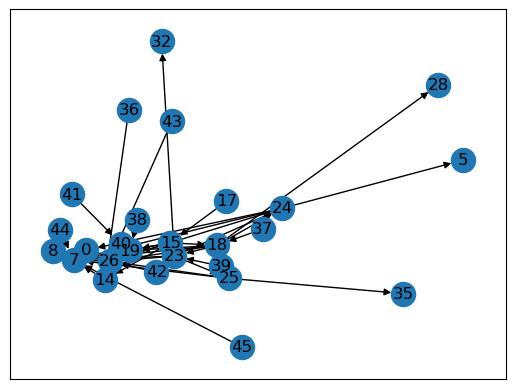

In [7]:
#values = [val_map.get(node, 0.25) for node in ts.nodes()]

#nx.draw(ts, cmap = plt.get_cmap('jet'))
#plt.show().

nx.draw_networkx(LS.g)
for lvl in LS.levels:
    print('Node #',lvl)
    print('------Incoming Gammas------')
    for gamma in LS.levels[lvl].inGammas:
        print(gamma.gE)
    print('------Outgoing Gammas------')
    for gamma in LS.levels[lvl].outGammas:
        print(gamma.gE)

print('Redundant nodes:')
for lvl in LS.levels:
    if lvl in LS.redundantNodes:
        print(lvl)

In [8]:
LS.build_gamma_cascades(TS) # Create a dictionary of all gamma-ray pathways between two nodes in the LS graph
LS.compute_path_lengths() # Compute the path lengths of all possible sequences by summing gamma-ray energies

In [9]:
print(LS.pathLengths)
LS.merge_redundant_leaves(energy_threshold=1) # Uses distances between a starting node and multiple leaf nodes to identify duplicate leaves
# Tolerance to distinguish between two states [keV]
LS.delete_edges_and_nodes() # Removes redundant edges and nodes from the graph; deletes corresponding Levels

{(23, 8): 1289.096892857143, (23, 5): 1289.1446999999998, (18, 8): 1373.78465, (15, 8): 1487.4643979310345, (17, 8): 1553.186547931034, (17, 35): 1553.2187566666664, (17, 5): 1553.2187533333333, (17, 32): 1553.219055, (17, 28): 1553.21785, (23, 35): 1289.1447, (18, 35): 1373.824925, (18, 5): 1373.82492, (18, 32): 1373.82524, (36, 8): 1553.2293000000002, (15, 35): 1487.4966066666666, (15, 5): 1487.496603333333, (15, 32): 1487.496905, (15, 28): 1487.4957000000002, (24, 8): 1257.3801833333332, (37, 8): 1553.1784599999996, (37, 35): 1553.218735, (37, 5): 1553.21873, (37, 32): 1553.21905, (37, 28): 1553.21781, (38, 8): 1553.2268, (26, 8): 329.42665, (39, 8): 1553.170892857143, (39, 35): 1553.2187, (39, 5): 1553.2187, (39, 32): 1553.219, (40, 8): 680.44665, (41, 8): 1510.34665, (25, 8): 1221.2613000000001, (19, 8): 1331.1183, (0, 8): 1135.80595, (14, 8): 1442.8363000000002, (42, 8): 1510.2766499999998, (43, 8): 1553.0266499999998, (44, 8): 1510.2359500000002, (45, 8): 1553.22595}
New edge:  

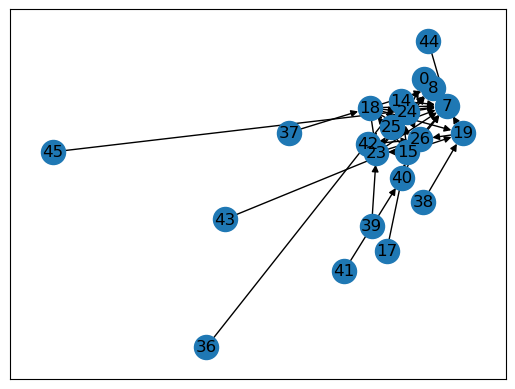

In [10]:
nx.draw_networkx(LS.g)

In [11]:
LS.find_leaf_nodes() # Finds any remaining leaf nodes
LS.leaf_node_deexcitation_energies() # Calculates the maximum deexcitation energy that results in final population of leaf node
LS.leaf_node_incoming_intensity(gammas,S) # Calculates the total intensity of gamma rays flowing into leaf nodes

Maximum energy lost when populating leaf nodes:  {(45, 8): 1553.2293000000002}
Total number of gammas going into each leaf node:  {8: 1263770.0}


In [12]:
LS.compute_level_energies(gsNode=8) # Node corresponding to ground state in Level Scheme; currently requires user input

In [13]:
for node in LS.g.nodes:
    print('Node: ',node,' Energy: ',LS.g.nodes[node]['energy'])
    print('Incoming gammas: ')
    for gamma in LS.levels[node].inGammas:
        print(gamma.gE)
    print('Outgoing gammas: ')
    for gamma in LS.levels[node].outGammas:
        print(gamma.gE)
    print('-------------------------------')

Node:  0  Energy:  1135.90635
Incoming gammas: 
121.5
Outgoing gammas: 
1035.7
-------------------------------
Node:  7  Energy:  100.10595
Incoming gammas: 
229.3207
1035.7
1273.719
1189.04
1121.29
1387.39
1342.73
1231.004
1157.302
1410.13
1453.12
Outgoing gammas: 
100.10595
-------------------------------
Node:  8  Energy:  0.0
Incoming gammas: 
100.10595
1257.407
1221.395
1289.145
1373.824
Outgoing gammas: 
-------------------------------
Node:  14  Energy:  1442.8359500000001
Incoming gammas: 
44.66
110.393
Outgoing gammas: 
1113.41
1342.73
-------------------------------
Node:  15  Energy:  1487.49595
Incoming gammas: 
65.72215
Outgoing gammas: 
44.66
113.6717
156.3864
198.35187
1158.1
1387.39
-------------------------------
Node:  17  Energy:  1553.2181
Incoming gammas: 
Outgoing gammas: 
65.72215
-------------------------------
Node:  18  Energy:  1373.82425
Incoming gammas: 
113.6717
179.39381
Outgoing gammas: 
42.7148
84.68024
116.4179
152.42991
1044.42
1273.719
1373.824
-----

In [14]:
LS.merge_redundant_roots(energy_threshold=1) # After computing energies of all levels, merges root nodes with same energy
LS.delete_edges_and_nodes()

In [15]:
for edge in LS.g.edges:
    print('Edge: ',edge,'Gamma energy: ',LS.g.edges[edge]['energy'],'Branching ratio: ',LS.g.edges[edge]['weight'])

Edge:  (0, 7) Gamma energy:  1035.7 Branching ratio:  1.0
Edge:  (7, 8) Gamma energy:  100.10595 Branching ratio:  1.0
Edge:  (14, 7) Gamma energy:  1342.73 Branching ratio:  0.3658291457286432
Edge:  (14, 26) Gamma energy:  1113.41 Branching ratio:  0.6341708542713568
Edge:  (15, 7) Gamma energy:  1387.39 Branching ratio:  0.011399933913426587
Edge:  (15, 14) Gamma energy:  44.66 Branching ratio:  0.004681132283291111
Edge:  (15, 18) Gamma energy:  113.6717 Branching ratio:  0.29237801519991186
Edge:  (15, 19) Gamma energy:  156.3864 Branching ratio:  0.4174468553805485
Edge:  (15, 23) Gamma energy:  198.35187 Branching ratio:  0.22893490472518999
Edge:  (15, 26) Gamma energy:  1158.1 Branching ratio:  0.04515915849763189
Edge:  (17, 15) Gamma energy:  65.72215 Branching ratio:  0.17037981746442948
Edge:  (18, 7) Gamma energy:  1273.719 Branching ratio:  0.05735118409362458
Edge:  (18, 19) Gamma energy:  42.7148 Branching ratio:  0.02328360037989032
Edge:  (18, 23) Gamma energy:  84.6

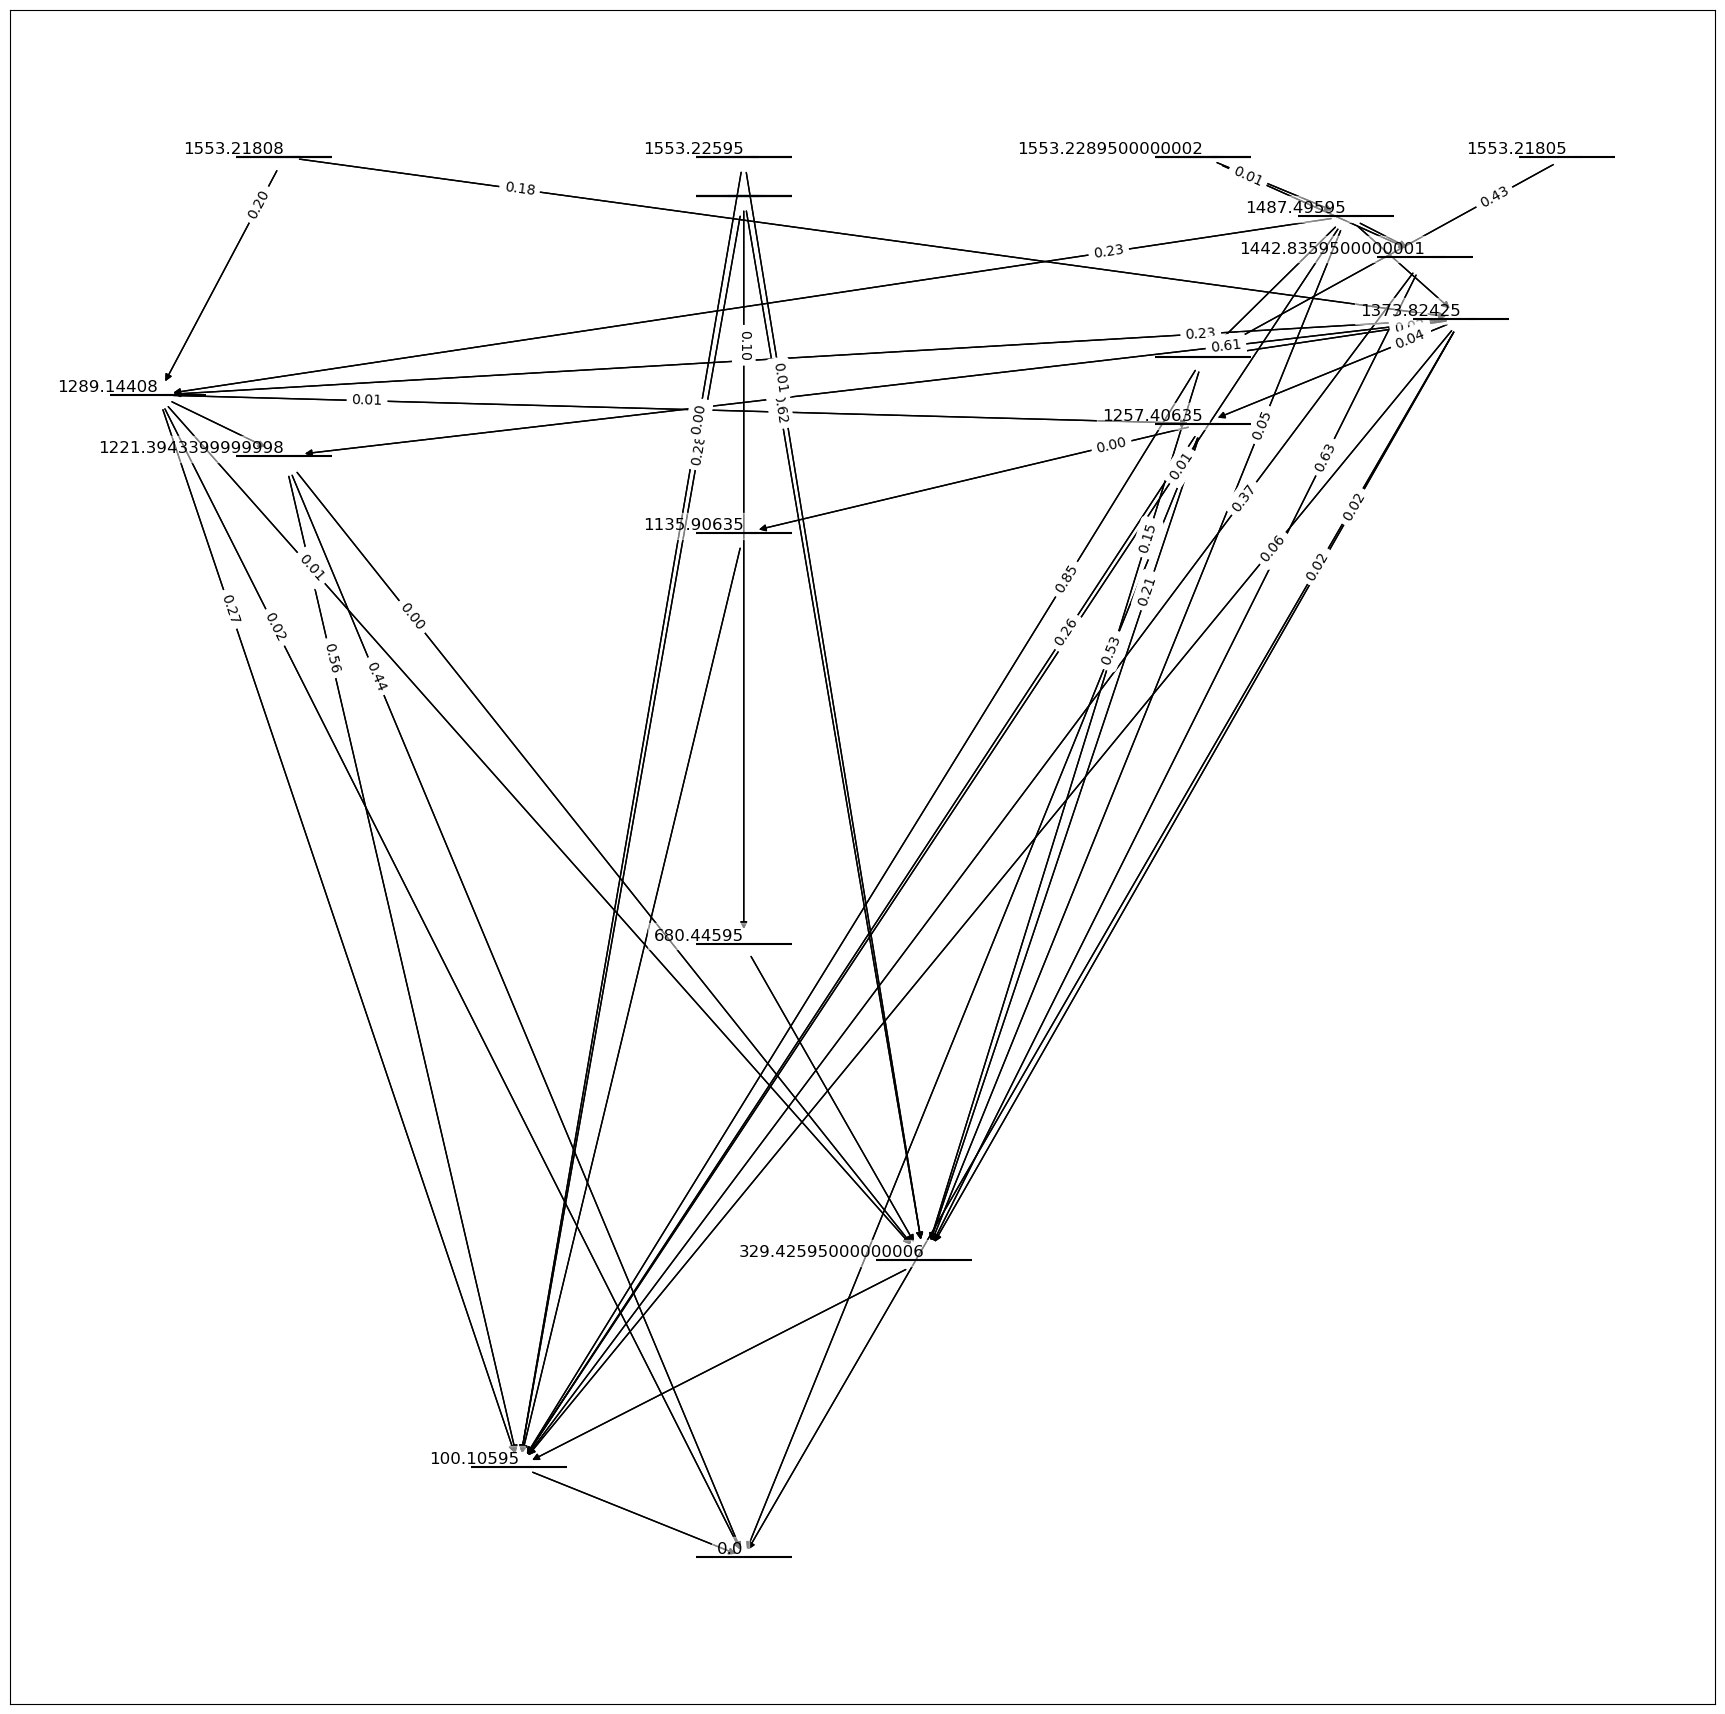

In [16]:
from Plotting import *
num_levels=len(LS.levels)
fig = plt.figure(figsize=(num_levels, num_levels))
ax = plt.gca()
draw_level_scheme(LS,ax,branch=True)
plt.show()